## Bibliotecas e informações sobre as colunas do Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder
from yellowbrick.features.pca import PCADecomposition
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from pycaret.regression import *
import plotly.express as px
import imblearn
import joblib
import threadpoolctl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
df.head(100)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0    5524        1957  Graduation         Single  58138.0        0         0   
1    2174        1954  Graduation         Single  46344.0        1         1   
2    4141        1965  Graduation       Together  71613.0        0         0   
3    6182        1984  Graduation       Together  26646.0        1         0   
4    5324        1981         PhD        Married  58293.0        1         0   
5    7446        1967      Master       Together  62513.0        0         1   
6     965        1971  Graduation       Divorced  55635.0        0         1   
7    6177        1985         PhD        Married  33454.0        1         0   
8    4855        1974         PhD       Together  30351.0        1         0   
9    5899        1950         PhD       Together   5648.0        1         1   
10   1994        1983  Graduation        Married      NaN        1         0   
11    387        1976       Basic        Married   7500.0        0         0   
12   2125        1959  Graduation       Divorced  63033.0        0         0   
13   8180        1952      Master       Divorced  59354.0        1         1   
14   2569        1987  Graduation        Married  17323.0        0         0   
15   2114        1946         PhD         Single  82800.0        0         0   
16   9736        1980  Graduation        Married  41850.0        1         1   
17   4939        1946  Graduation       Together  37760.0        0         0   
18   6565        1949      Master        Married  76995.0        0         1   
19   2278        1985    2n Cycle         Single  33812.0        1         0   
20   9360        1982  Graduation        Married  37040.0        0         0   
21   5376        1979  Graduation        Married   2447.0        1         0   
22   1993        1949         PhD        Married  58607.0        0         1   
23   4047        1954         PhD        Married  65324.0        0         1   
24   1409        1951  Graduation       Together  40689.0        0         1   
25   7892        1969  Graduation         Single  18589.0        0         0   
26   2404        1976  Graduation        Married  53359.0        1         1   
27   5255        1986  Graduation         Single      NaN        1         0   
28   9422        1989  Graduation        Married  38360.0        1         0   
29   1966        1965         PhD        Married  84618.0        0         0   
30   6864        1989      Master       Divorced  10979.0        0         0   
31   3033        1963      Master       Together  38620.0        0         0   
32   5710        1970  Graduation       Together  40548.0        0         1   
33   7373        1952         PhD       Divorced  46610.0        0         2   
34   8755        1946      Master        Married  68657.0        0         0   
35  10738        1951      Master         Single  49389.0        1         1   
36   4339        1970         PhD        Married  67353.0        0         1   
37  10755        1976    2n Cycle        Married  23718.0        1         0   
38   8595        1973  Graduation          Widow  42429.0        0         1   
39   2968        1943         PhD       Divorced  48948.0        0         0   
40   8601        1980  Graduation        Married  80011.0        0         1   
41    503        1985      Master        Married  20559.0        1         0   
42   8430        1957  Graduation       Together  21994.0        0         1   
43   7281        1959         PhD         Single      NaN        0         0   
44   2139        1975      Master        Married   7500.0        1         0   
45   1371        1976  Graduation         Single  79941.0        0         0   
46   9909        1996    2n Cycle        Married   7500.0        0         0   
47   7286        1968  Graduation       Together  41728.0        1         0   
48   7244        1951  Graduation         Single      NaN        2         1   
49   65

In [4]:
df.isnull().sum()/len(df)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
print('Quantidade de linhas ANTES de tirar os nulos: ' + str(df.shape[0]))

Quantidade de linhas ANTES de tirar os nulos: 2240


In [7]:
df.dropna(inplace = True)
print('Quantidade de linhas DEPOIS de tirar os nulos: ' + str(df.shape[0]))

Quantidade de linhas DEPOIS de tirar os nulos: 2216


In [8]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2216.000000       2216.000000   2216.000000        2216.000000   
mean         37.637635         27.028881     43.965253           2.323556   
std          54.752082         41.072046     51.815414           1.923716   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.500000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        262.000000    321.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.319043      0.073556      0.074007      0.073105   
std             2.425359      0.261106      0.261842      0.260367   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2216.000000   2216.000000  2216.000000         2216.0     2216.0   
mean       0.064079      0.013538     0.009477            3.0       11.0   
std        0.244950      0.115588     0.096907            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2216.000000  
mean      0.150271  
std       0.357417  
min       0.000000  
25%       0.000000  
50%   

In [9]:
df.describe(include = 'object')

Education Marital_Status Dt_Customer
count         2216           2216        2216
unique           5              8         662
top     Graduation        Married  31-08-2012
freq          1116            857          12

## Tratamento de Colunas

### Coluna Education

In [10]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [11]:
df['Education'] = df['Education'].replace({'Basic' : 1, '2n Cycle':1, 'Graduation':2, 'Master':3, 'PhD':4})

In [12]:
df['Education'].value_counts()

2    1116
4     481
3     365
1     254
Name: Education, dtype: int64

### Coluna Marital Status

In [13]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married':2, 'Together':2, 'Single':1, 'Divorced':1, 'Widow':1, 'Alone':1, 'Absurd':1, 'YOLO':1})

In [15]:
df['Marital_Status'].value_counts()

2    1430
1     786
Name: Marital_Status, dtype: int64

### Coluna Age

In [16]:
df['Age'] = 2015 - df['Year_Birth']

In [17]:
df.drop(columns = ['Year_Birth'], axis = 1, inplace = True)

### Coluna Spent

In [18]:
[i for i in df.columns if 'Mnt' in i]

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [19]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Coluna Family Size

In [20]:
df['Family_size'] = df['Kidhome'] + df['Teenhome'] + df['Marital_Status']

### Coluna Parent

In [21]:
df['Parent'] = df['Kidhome'] + df['Teenhome']

In [22]:
df['Parent'] = np.where(df['Parent'] > 0,1,0)

### Tratamento de Data

In [23]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')

In [24]:
df['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

In [25]:
df['Life_Time'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

### Tratamento de Respostas as Promoções

In [26]:
df['Total_Response'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

## EDA

### Matriz de Correlação

<AxesSubplot: >

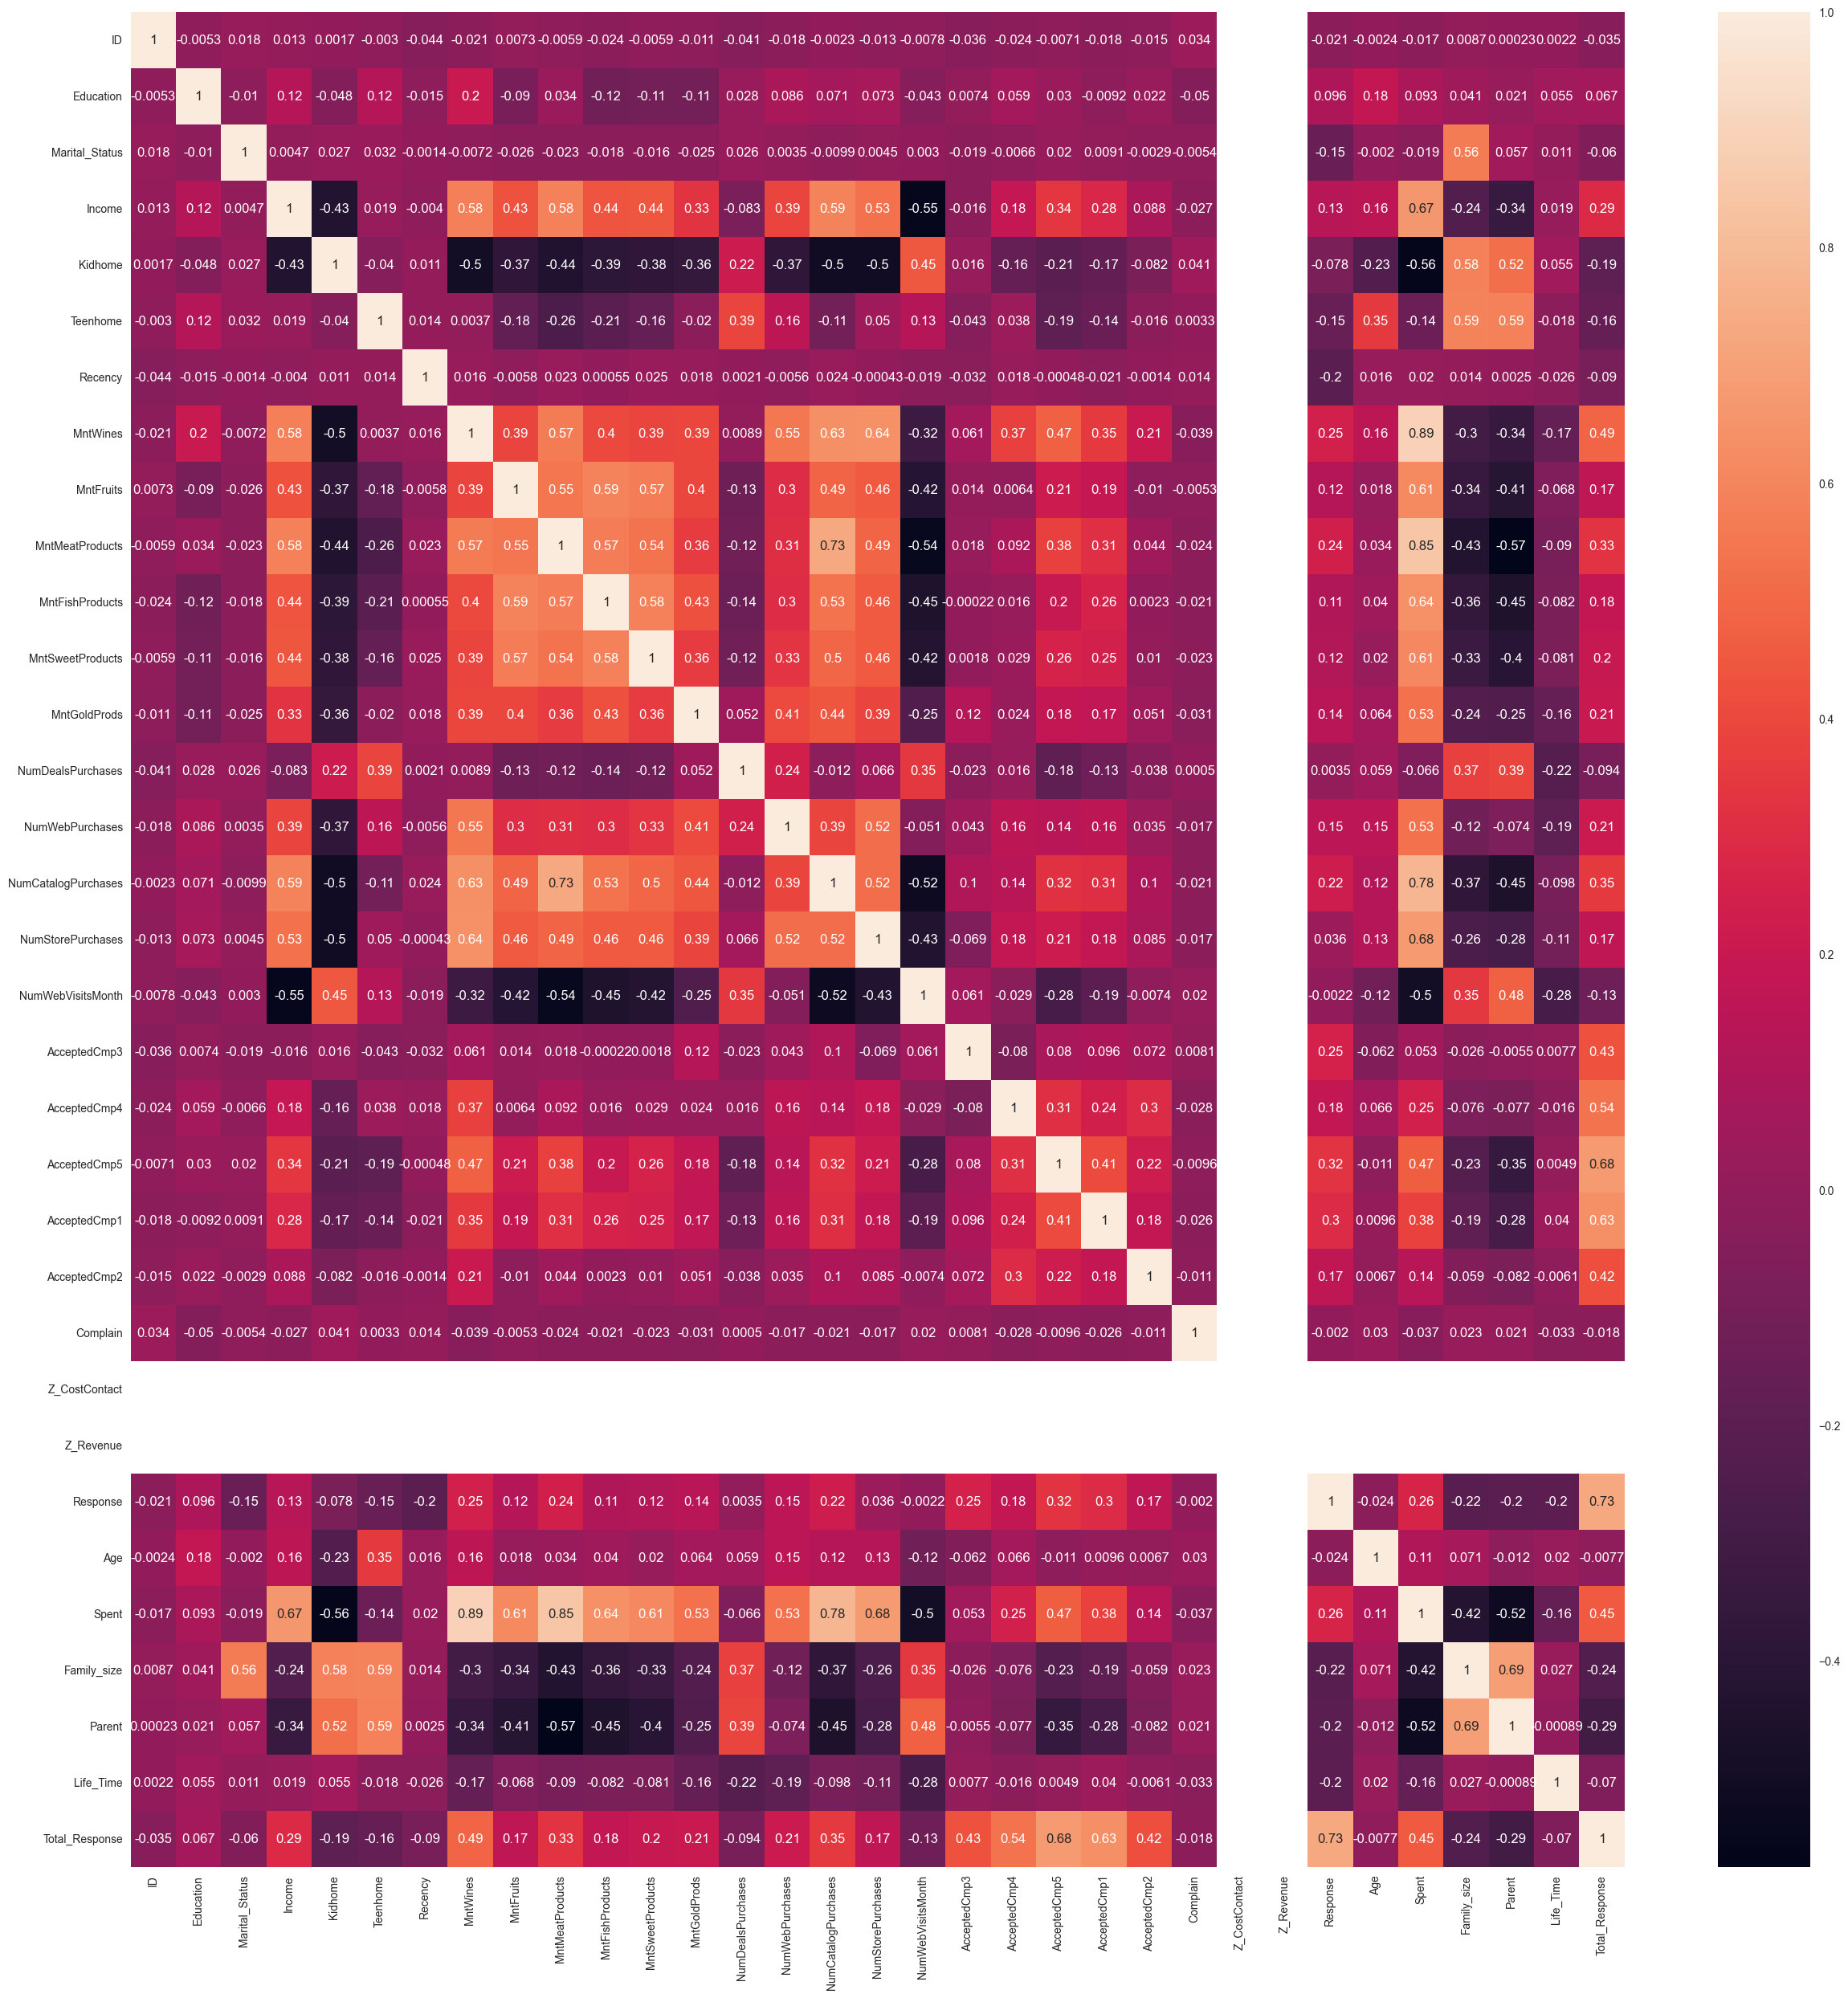

In [27]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot = True)

In [28]:
df.drop([i for i in df.columns if 'Z_' in i], axis = 1, inplace = True)

### Boxplots - Tirando Outliers

<AxesSubplot: ylabel='Age'>

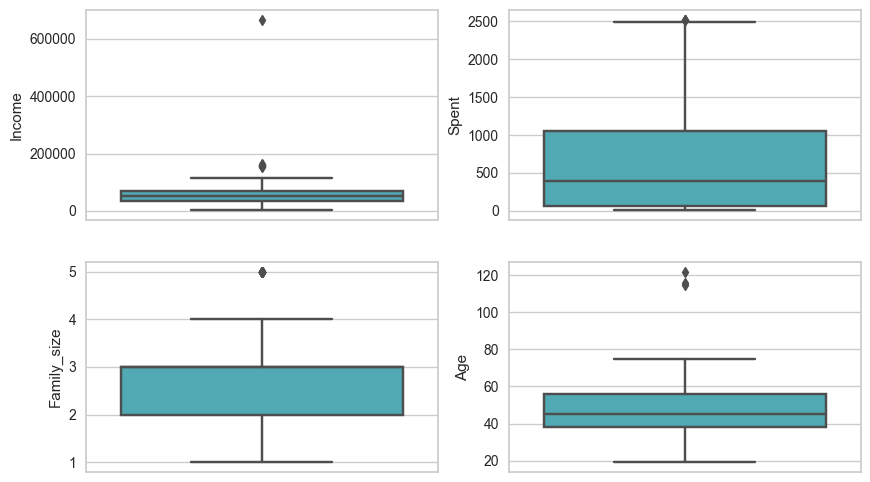

In [29]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(data = df, y = 'Income', ax=axes[0][0], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Spent', ax=axes[0][1], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Family_size', ax=axes[1][0], palette = 'YlGnBu')
sns.boxplot(data = df, y = 'Age', ax=axes[1][1], palette = 'YlGnBu')

In [30]:
df = df[df['Income'] < 600000]
df = df[df['Age'] < 90]

### Countplots

<AxesSubplot: xlabel='Family_size', ylabel='count'>

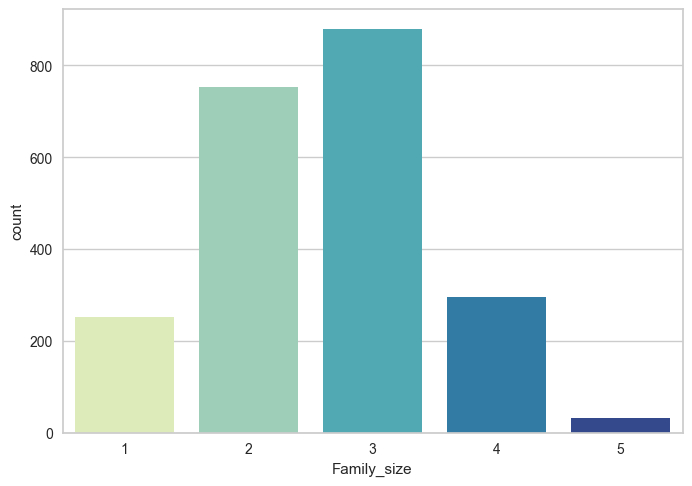

In [31]:
sns.countplot(data = df, x = 'Family_size', palette = 'YlGnBu')

<AxesSubplot: xlabel='Education', ylabel='count'>

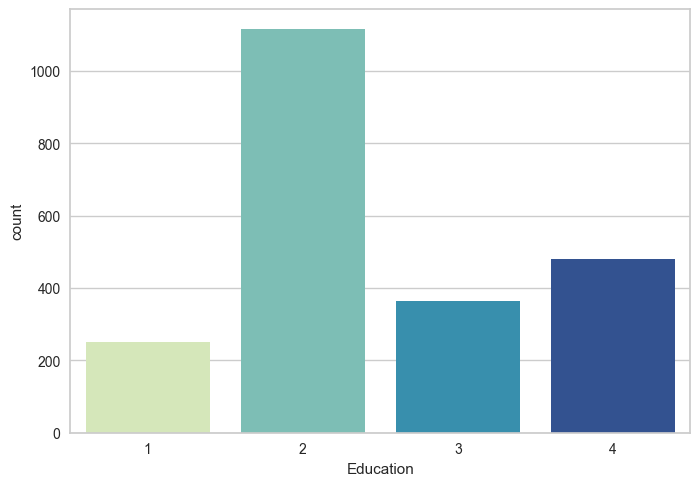

In [32]:
sns.countplot(data = df, x = 'Education', palette = 'YlGnBu')

### Histogramas

<AxesSubplot: xlabel='Total_Response', ylabel='Density'>

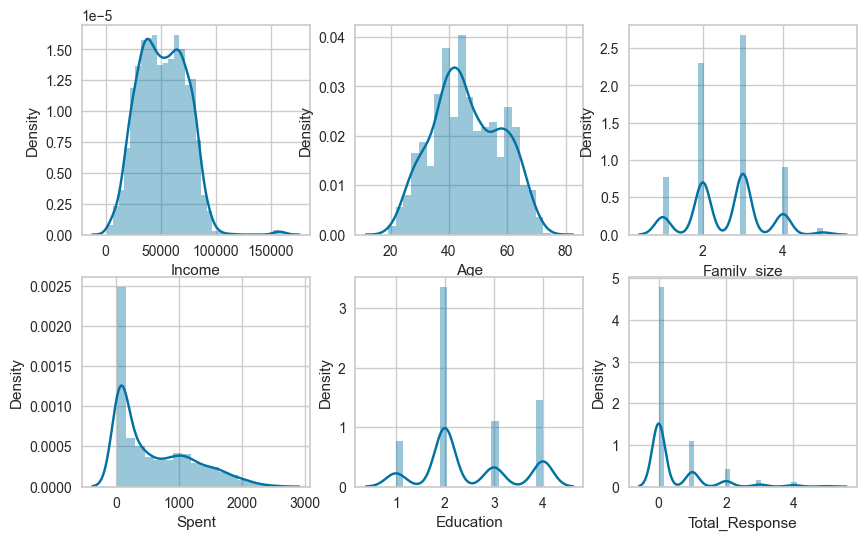

In [33]:
fig, axes = plt.subplots(2,3, figsize=(10,6))
sns.distplot(df['Income'], ax=axes[0][0])
sns.distplot(df['Age'], ax=axes[0][1])
sns.distplot(df['Family_size'], ax=axes[0][2])
sns.distplot(df['Spent'], ax=axes[1][0])
sns.distplot(df['Education'], ax=axes[1][1])
sns.distplot(df['Total_Response'], ax=axes[1][2])

## Criação dos Grupos de Análise

### Grupo com a maioria das colunas

In [34]:
grupo_1 = df.drop(columns = ['ID', 'Dt_Customer'])

In [35]:
grupo_1.shape

(2212, 30)

### Grupo com informações demográficas

In [36]:
grupo_2 = df[['Education', 'Marital_Status', 'Income', 'Age', 'Spent', 'Family_size', 'Parent', 'Life_Time', 'Total_Response']]

In [37]:
grupo_2.shape

(2212, 9)

## PCA

### PCA - Grupo 1

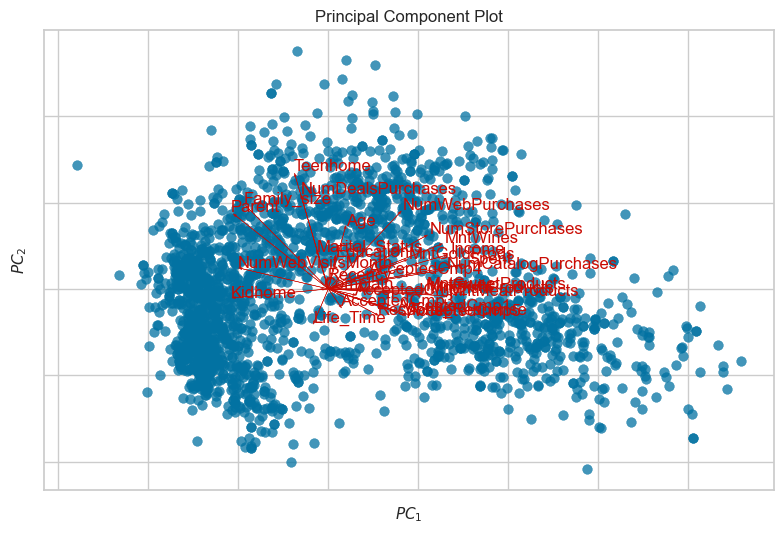

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [38]:
X_1 = grupo_1
norm = StandardScaler().fit(X_1)
X_std_1 = norm.transform(X_1)

visualizer = PCADecomposition(scale=True, proj_features=True,)


visualizer.fit_transform(pd.DataFrame( X_std_1, columns=X_1.columns))
visualizer.show()

In [39]:
pca_1 = PCA(0.7)
pca_1.fit(X_std_1)

pc1 = pca_1.transform(X_std_1)[:,0]
pc2 = pca_1.transform(X_std_1)[:,1]
pc3 = pca_1.transform(X_std_1)[:,2]

import plotly.express as px

fig = px.scatter_3d(x=pc1, y=pc2, z=pc3)
fig.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [40]:
grupo_1_componentes = pd.DataFrame(pca_1.components_, columns = X_1.columns).T
grupo_1_componentes

0         1         2         3         4  \
Education            0.016441  0.128980  0.100903 -0.295123 -0.279965   
Marital_Status      -0.026222  0.148917 -0.005808 -0.146786  0.609205   
Income               0.280898  0.139616 -0.050653 -0.179956  0.038938   
Kidhome             -0.225463 -0.036298  0.118292  0.119220  0.264375   
Teenhome            -0.080036  0.474423  0.042100 -0.146056 -0.064397   
Recency             -0.001470  0.036361 -0.082350 -0.058028  0.043890   
MntWines             0.269473  0.185563  0.128065 -0.049511 -0.072102   
MntFruits            0.224886 -0.007716 -0.178369  0.143564  0.138690   
MntMeatProducts      0.279038 -0.028666 -0.083000  0.024487  0.085478   
MntFishProducts      0.234725 -0.017507 -0.182680  0.136317  0.149391   
MntSweetProducts     0.227334  0.000674 -0.153569  0.121706  0.161312   
MntGoldProds         0.184703  0.119094 -0.054639  0.258147  0.043885   
NumDealsPurchases   -0.064265  0.381864  0.092724  0.276430 -0.025833   
NumWebPurchases      0.171559  0.318083  0.034847  0.181363 -0.109515   
NumCatalogPurchases  0.274475  0.078134 -0.040789  0.013058  0.034340   
NumStorePurchases    0.233492  0.220397 -0.104204 -0.014226 -0.050421   
NumWebVisitsMonth   -0.209605  0.085313  0.210532  0.330604 -0.096116   
AcceptedCmp3         0.027668 -0.068948  0.225315  0.191151  0.096464   
AcceptedCmp4         0.092457  0.060471  0.319643 -0.208069 -0.079534   
AcceptedCmp5         0.180631 -0.107887  0.272989 -0.136399  0.157451   
AcceptedCmp1         0.159046 -0.089419  0.253151 -0.077317  0.191017   
AcceptedCmp2         0.059989 -0.023373  0.287302 -0.126472 -0.007232   
Complain            -0.012409 -0.000745 -0.003667  0.057482  0.038017   
Response             0.114810 -0.105230  0.373554  0.205107 -0.091941   
Age                  0.040475  0.253818 -0.021629 -0.279306 -0.245089   
Spent                0.322252  0.101386 -0.002729  0.033711  0.028944   
Family_size         -0.195500  0.342035  0.092307 -0.094573  0.439601   
Parent              -0.224237  0.307540  0.095551  0.040409  0.071738   
Life_Time           -0.033793 -0.136229 -0.075324 -0.471039  0.122240   
Total_Response       0.185206 -0.103546  0.495504 -0.000269  0.065379   

                            5         6         7         8  
Education           -0.264426  0.442366 -0.025484  0.404752  
Marital_Status       0.036592  0.272325  0.082491  0.046222  
Income              -0.071500  0.019120  0.009661  0.019952  
Kidhome             -0.018168  0.116454 -0.039467  0.120426  
Teenhome            -0.135455 -0.256960  0.002260 -0.130922  
Recency              0.389929 -0.370056 -0.271210  0.701614  
MntWines             0.097592  0.110406 -0.012471  0.098655  
MntFruits           -0.048700 -0.038881  0.017207 -0.088149  
MntMeatProducts     -0.038941  0.161447  0.017215  0.149355  
MntFishProducts     -0.022357 -0.054394 -0.002353 -0.101545  
MntSweetProducts     0.006208 -0.059262 -0.009731 -0.086729  
MntGoldProds        -0.057004 -0.255942 -0.125929 -0.079593  
NumDealsPurchases    0.041289  0.074743 -0.048773  0.013460  
NumWebPurchases      0.025669  0.002283 -0.036843 -0.043763  
NumCatalogPurchases -0.092651  0.027022 -0.017853  0.132899  
NumStorePurchases    0.100694  0.035885  0.020351 -0.080145  
NumWebVisitsMonth    0.152683  0.084010 -0.013945  0.028216  
AcceptedCmp3        -0.514079 -0.342833 -0.177899  0.254566  
AcceptedCmp4         0.418440 -0.015100  0.028699 -0.173312  
AcceptedCmp5         0.101010  0.030863  0.032792  0.054823  
AcceptedCmp1         0.002217 -0.086302 -0.023948 -0.073070  
AcceptedCmp2         0.263515 -0.220005 -0.024160 -0.143689  
Complain             0.007751 -0.257965  0.901672  0.245918  
Response            -0.257717  0.137600  0.087254 -0.026996  
Age                 -0.191103 -0.186884  0.133543 -0.037693  
Spent                0.030431  0.088386 -0.011124  0.083031  
Family_size         -0.072795  0.058453  0.021524  0.017130  
Parent              -0.05339

### PCA - Grupo 2

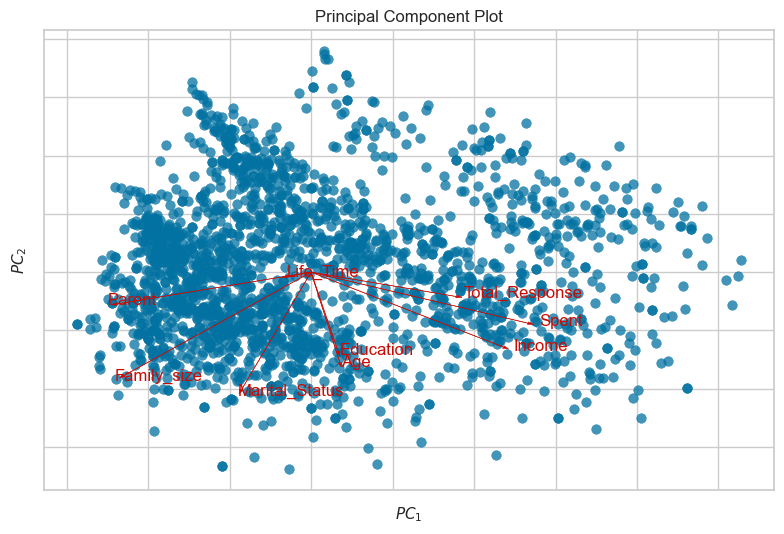

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [44]:
X_2 = grupo_2
norm = StandardScaler().fit(X_2)
X_std_2 = norm.transform(X_2)

visualizer = PCADecomposition(scale=True, proj_features=True,)


visualizer.fit_transform(pd.DataFrame( X_std_2, columns=X_2.columns))
visualizer.show()

In [45]:
plt.figure(figsize = (6,6))
p1 = sns.scatterplot(data=pca_1.transform(X_std_1), x='PC1', y='PC2')
for line in range(0, loadings.shape[0]):
    p1.text(loadings.iloc[line, 0] + 0.05,
            loadings.iloc[line, 1],
            loadings.index[line],
            horizontalalignment='left',
            size='medium',
            color='black')

ValueError: Could not interpret value `PC1` for parameter `x`

<Figure size 600x600 with 0 Axes>

In [46]:
pca_2 = PCA(0.7)
pca_2.fit(X_std_2)

pc1 = pca_2.transform(X_std_2)[:,0]
pc2 = pca_2.transform(X_std_2)[:,1]
pc3 = pca_2.transform(X_std_2)[:,2]

import plotly.express as px

fig = px.scatter_3d(x=pc1, y=pc2, z=pc3)
fig.show();

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [47]:
pca_2.n_components_

4

In [48]:
grupo_2_componentes = pd.DataFrame(pca_2.components_, columns = X_2.columns)
grupo_2_componentes

Education  Marital_Status    Income       Age     Spent  Family_size  \
0   0.062753       -0.161932  0.447537  0.067266  0.504829    -0.435116   
1  -0.358218       -0.532247 -0.339038 -0.410287 -0.230910    -0.467645   
2   0.527529       -0.478695 -0.006981  0.453488 -0.165617    -0.165061   
3   0.174375       -0.310163 -0.098923  0.266184  0.031739    -0.000646   

     Parent  Life_Time  Total_Response  
0 -0.451618  -0.053960        0.337604  
1 -0.143629  -0.018743       -0.110085  
2  0.079144   0.431662       -0.198981  
3  0.233000  -0.858441        0.023107

In [49]:
pca_2.transform(X_std_2)

array([[ 2.99985106,  1.0081689 , -0.05695193,  1.58432826],
       [-1.04557938,  0.42039318,  1.70672916, -0.22067592],
       [ 1.23878201, -0.13919414, -0.35185487, -0.86728936],
       ...,
       [ 2.38728893,  1.96518441,  0.19964295, -1.13029674],
       [-0.15835958, -1.66691413,  0.85750533, -0.61189735],
       [-0.9619022 , -2.19335604,  0.27868097,  1.65729386]])

## KMeans

### KMeans - Grupo 1

#### Métricas de avaliação - Grupo 1

##### Cotovelo - Grupo 1

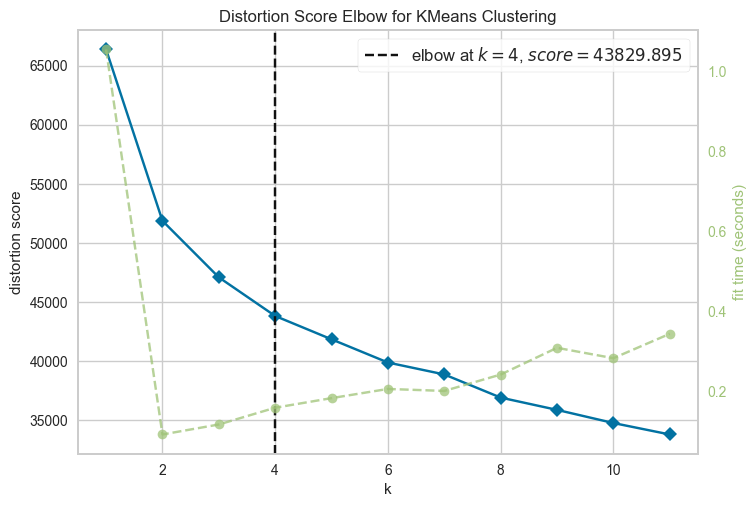

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std_1)
visualizer.show()
visualizer

##### Silhueta - Grupo 1

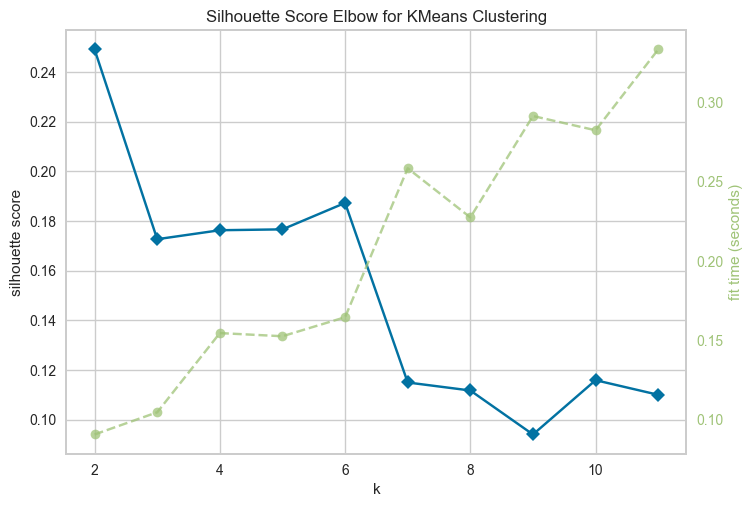

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 k=None, metric='silhouette', model=None)

In [51]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette')

visualizer.fit(X_std_1)
visualizer.show()
visualizer

### KMeans - Grupo 2

#### Normalização - Grupo 2

In [52]:
scaler = StandardScaler()
X_std_2 = scaler.fit_transform(grupo_2)

#### Métricas de Avaliação - Grupo 2

##### Cotovelo - Grupo 2

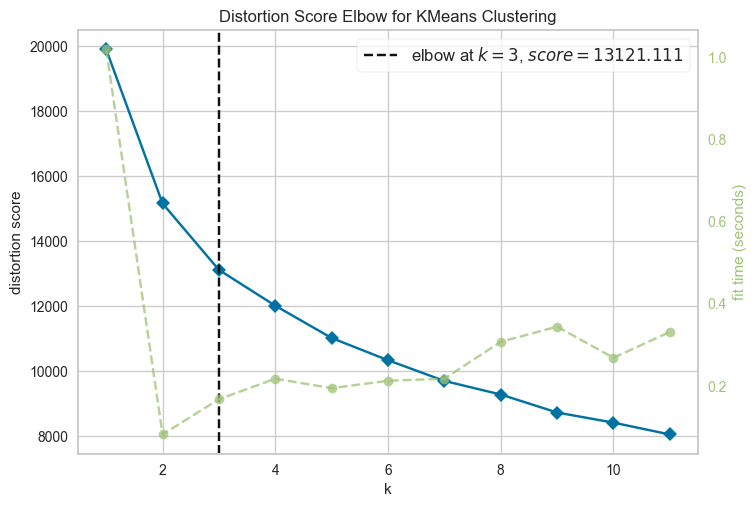

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [53]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X_std_2)
visualizer.show()
visualizer

##### Silhueta - Grupo 2

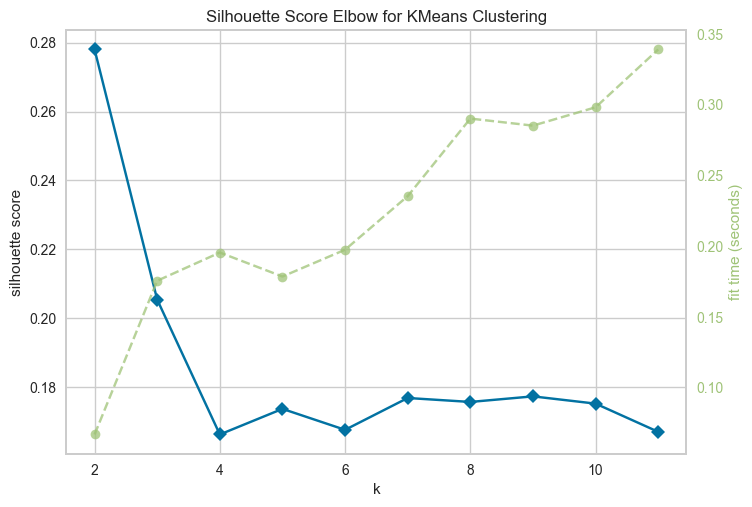

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 k=None, metric='silhouette', model=None)

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette')

visualizer.fit(X_std_2)
visualizer.show()
visualizer

### KMeans - Grupo PCA

#### Métricas de Avaliação - Grupo PCA

##### Cotovelo - Grupo PCA

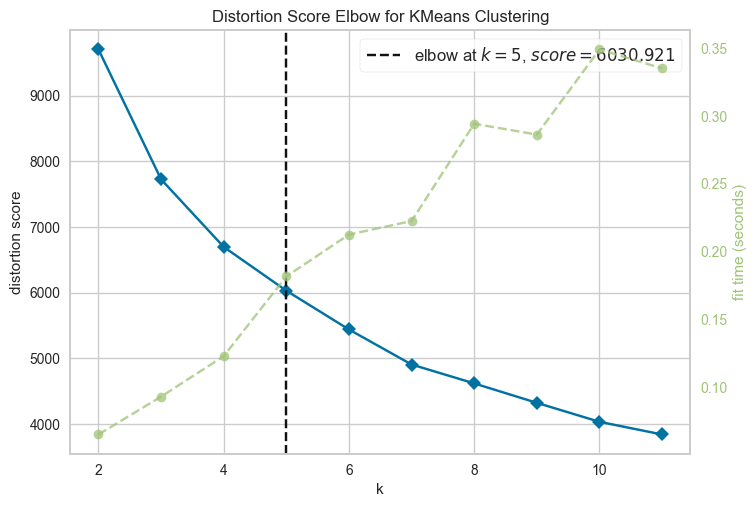

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [56]:
model_3 = KMeans()
visualizer = KElbowVisualizer(model_3, k=(2,12))

visualizer.fit(pca_2.transform(X_std_2))
visualizer.show()
visualizer

##### Silhueta - Grupo PCA

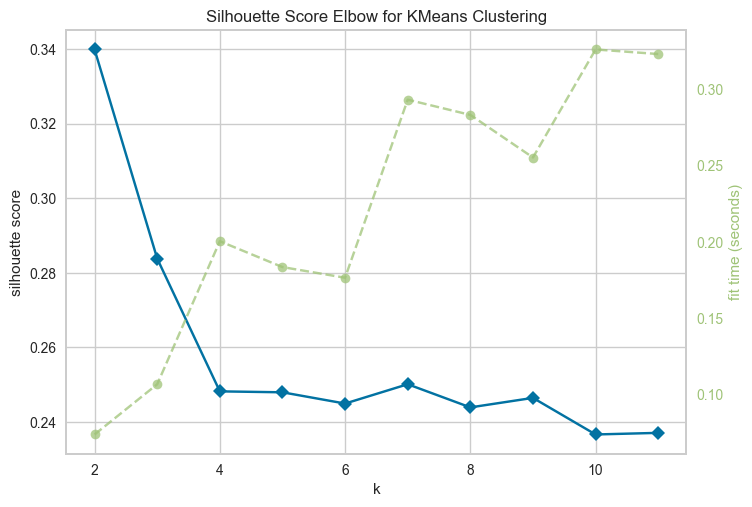

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 k=None, metric='silhouette', model=None)

In [57]:
model_3 = KMeans()
visualizer = KElbowVisualizer(model_3, k=(2,12), metric = 'silhouette')

visualizer.fit(pca_2.transform(X_std_2))
visualizer.show()
visualizer

In [58]:
kmeans = KMeans(5)
kmeans.fit(pca_2.fit_transform(X_std_2))
df['Clusters'] = kmeans.labels_

In [59]:
df['Clusters'].value_counts()

1    575
3    567
2    513
0    336
4    221
Name: Clusters, dtype: int64

In [88]:
df.groupby('Clusters')['Education', 'Income', 'Marital_Status', 'Total_Response', 'Life_Time', 'Family_size', 'Parent', 'Spent'].mean()

Education        Income  Marital_Status  Total_Response   Life_Time  \
Clusters                                                                        
0          2.541667  77362.089286        1.985119        1.139881  343.556548   
1          2.448696  41971.440000        1.060870        0.227826  337.365217   
2          1.847953  35513.592593        1.990253        0.153996  342.927875   
3          3.024691  53147.037037        1.977072        0.241623  359.135802   
4          2.588235  74447.085973        1.000000        1.190045  338.461538   

          Family_size    Parent        Spent  
Clusters                                      
0            2.130952  0.133929  1401.175595  
1            2.168696  0.857391   325.045217  
2            3.161793  0.906433   198.970760  
3            3.375661  0.989418   508.966490  
4            1.072398  0.072398  1334.502262

In [61]:
df['Education'].value_counts()

2    1115
4     480
3     365
1     252
Name: Education, dtype: int64

## Gaussian Mixture

### Gaussian Mixture - Grupo 1

#### Silhueta - Grupo 1

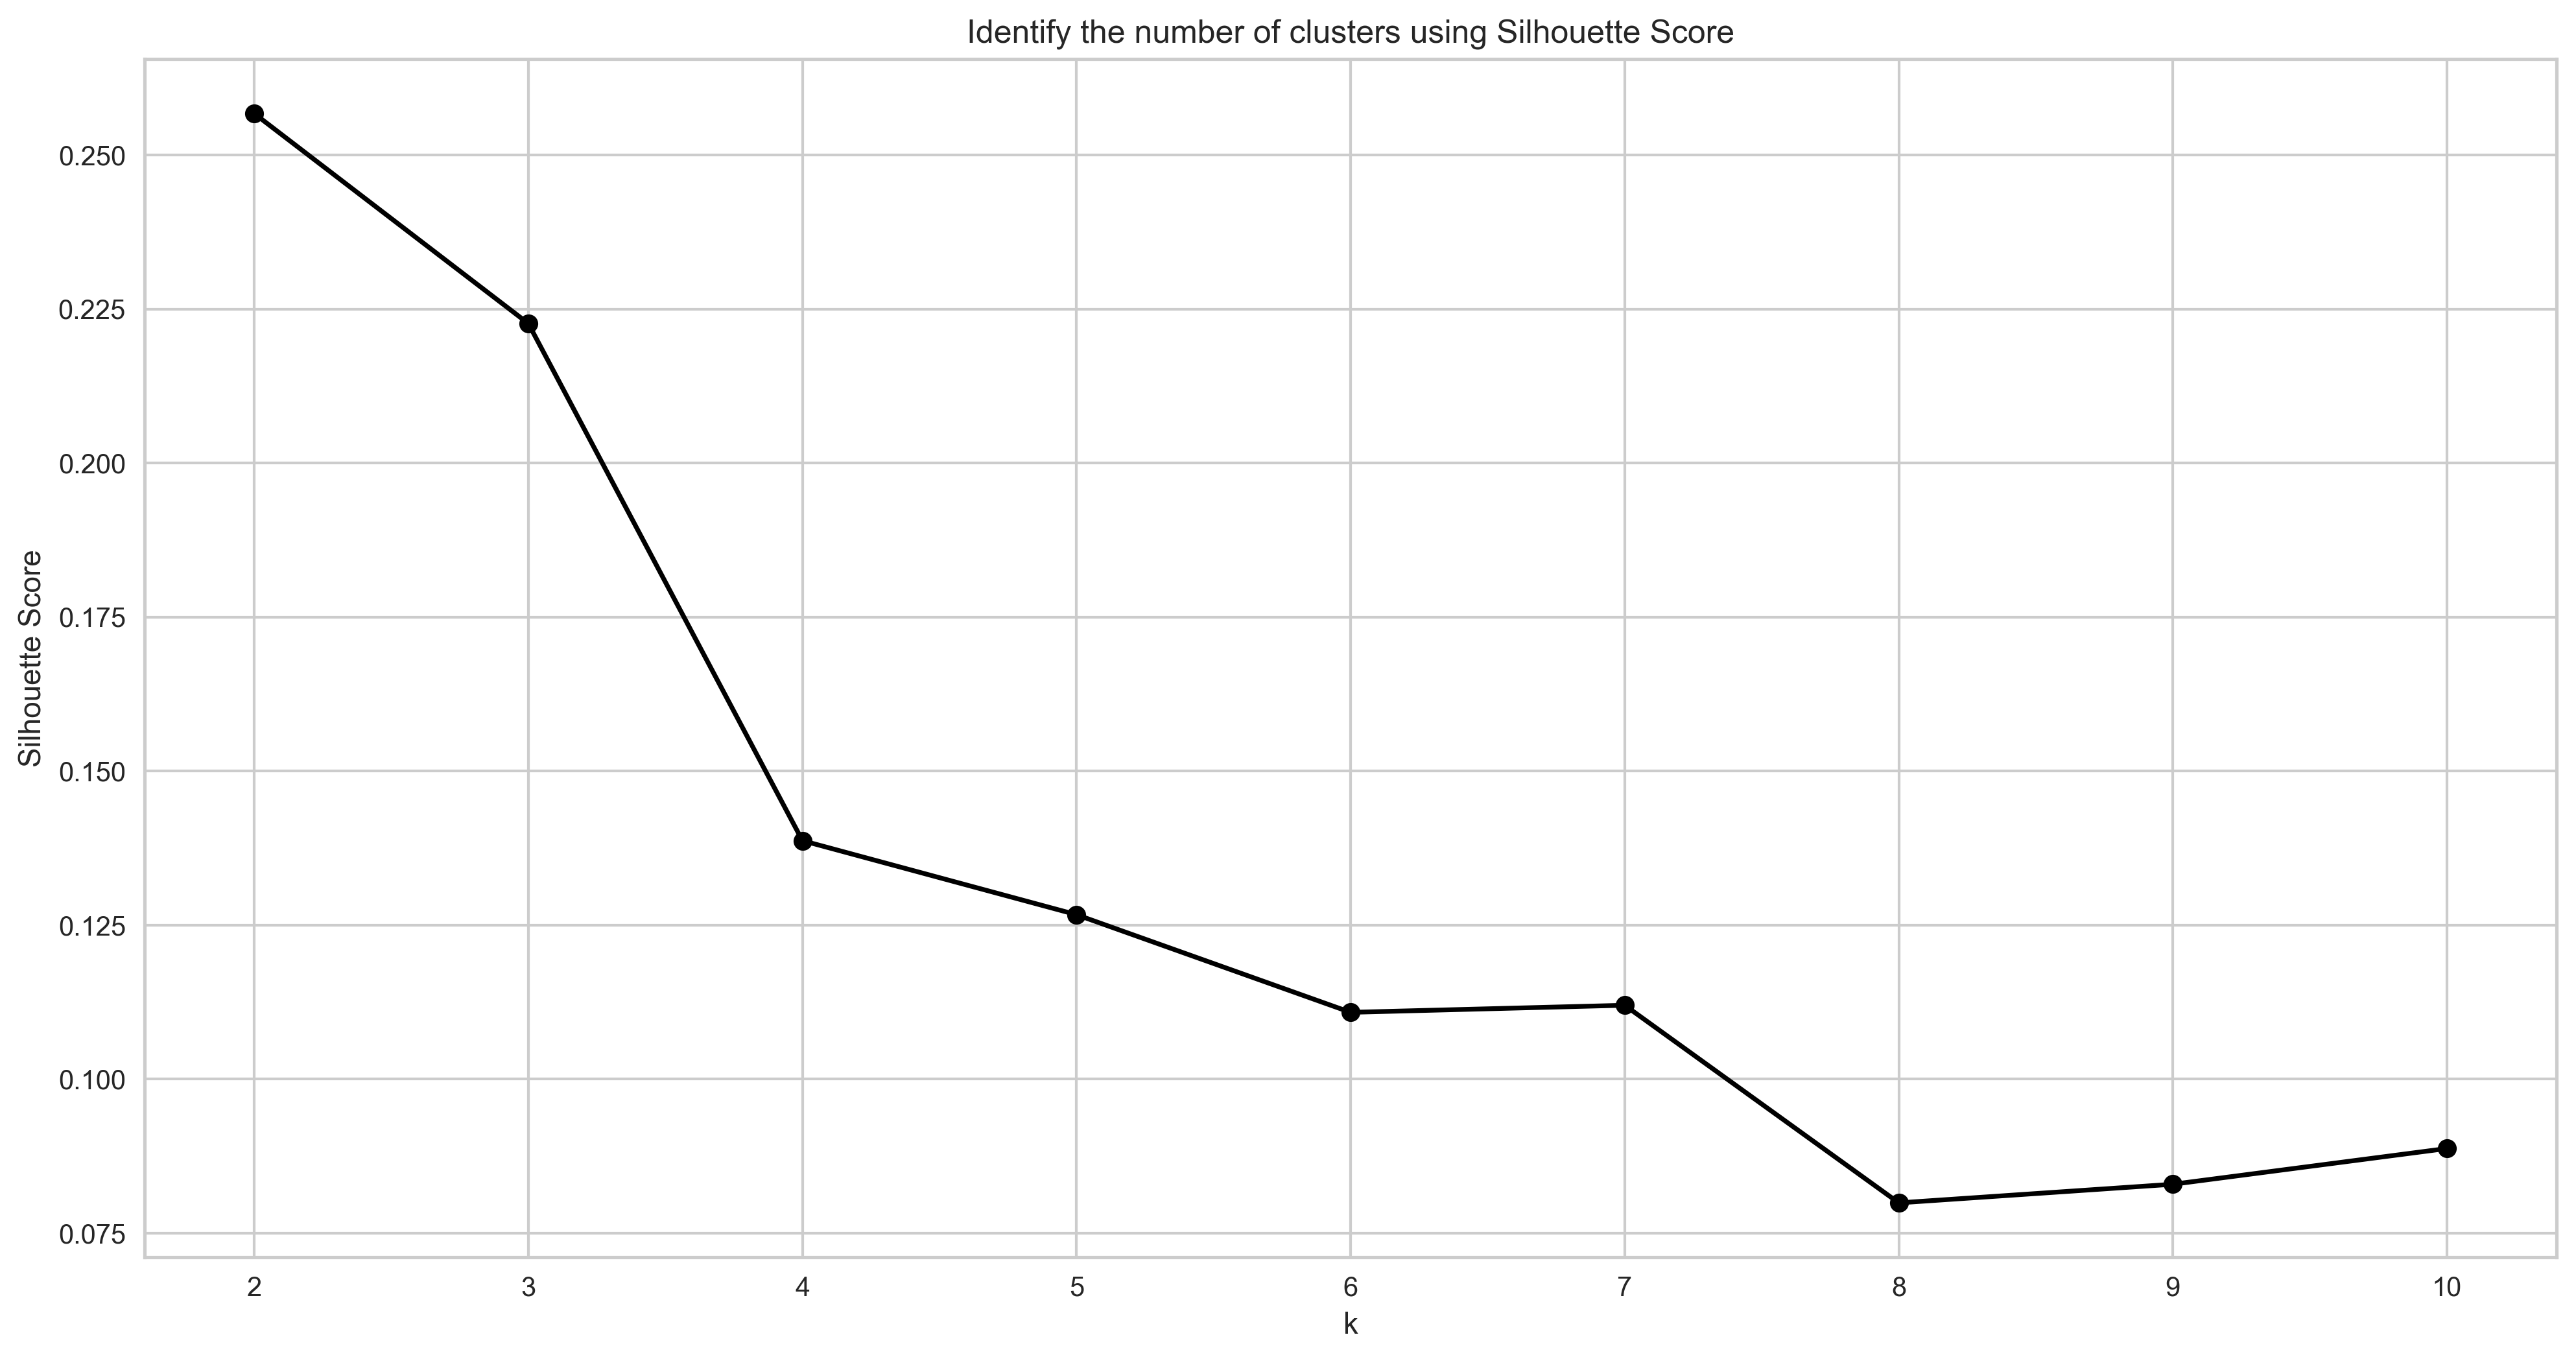

In [62]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = X_std_1

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(10,5), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

### Gaussian Mixture - Grupo 2

#### Silhueta - Grupo 2

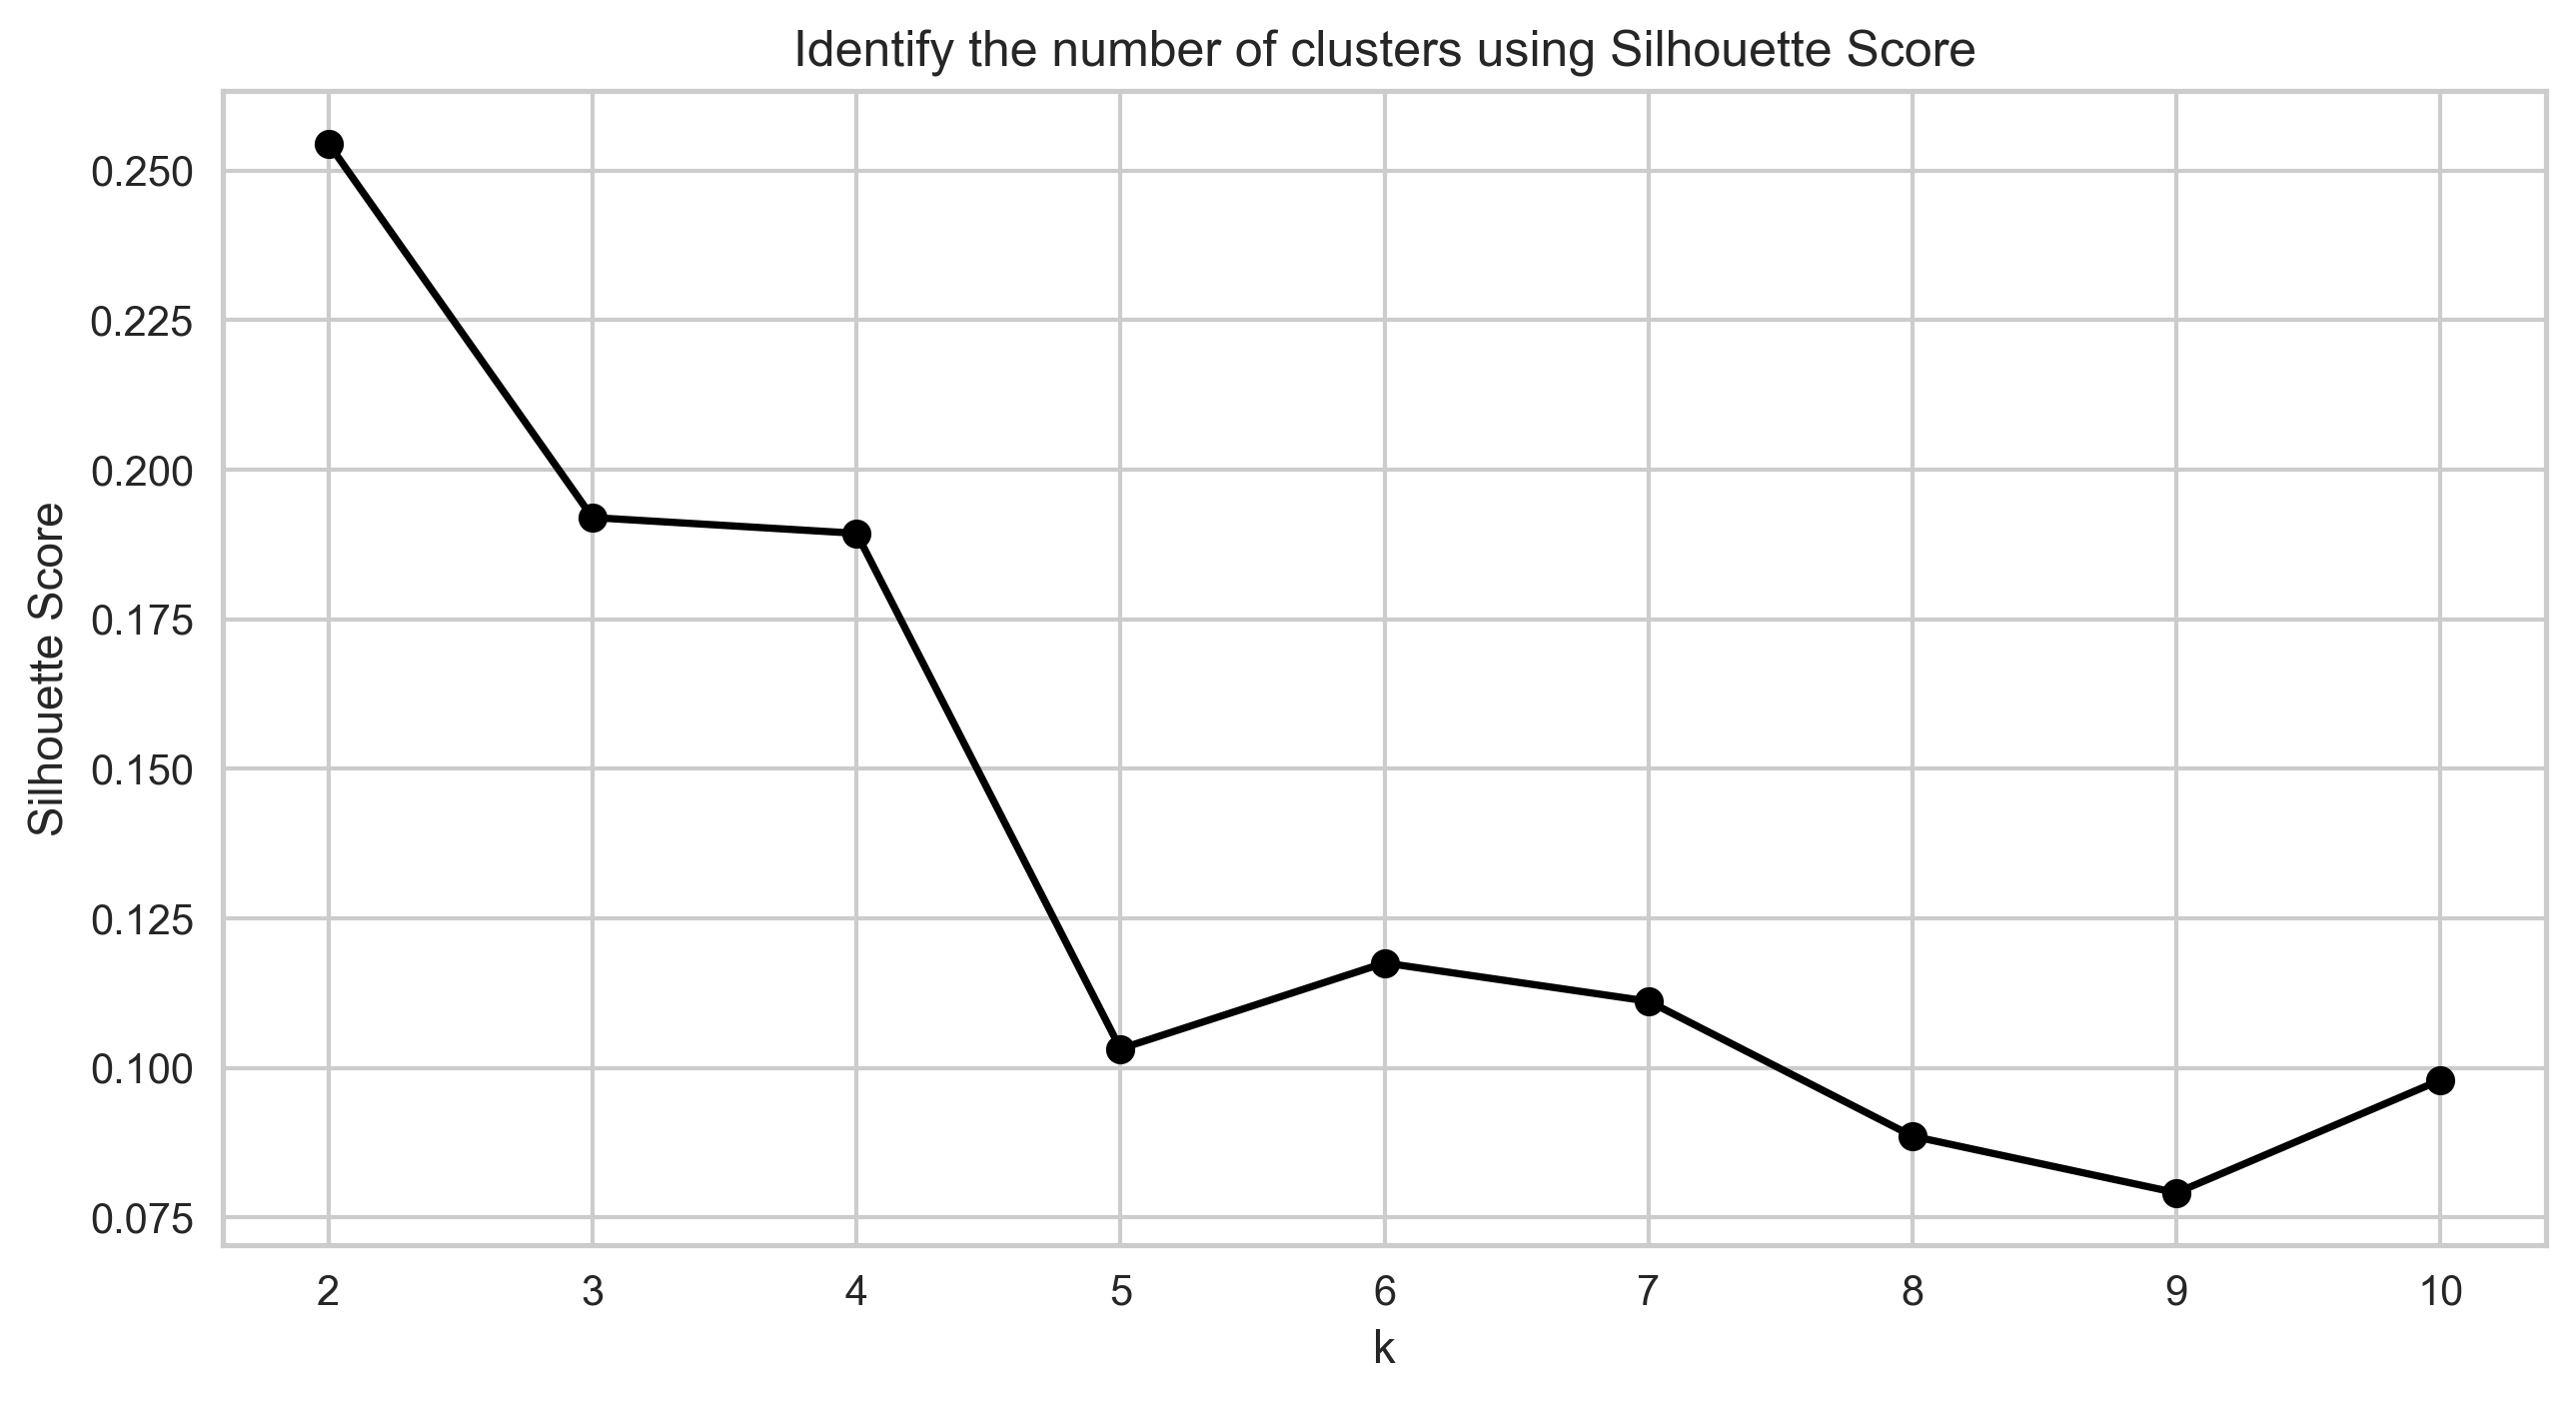

In [64]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = X_std_2

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(10,5), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

### Gaussian Mixture - Grupo PCA

#### Silhueta - Grupo PCA

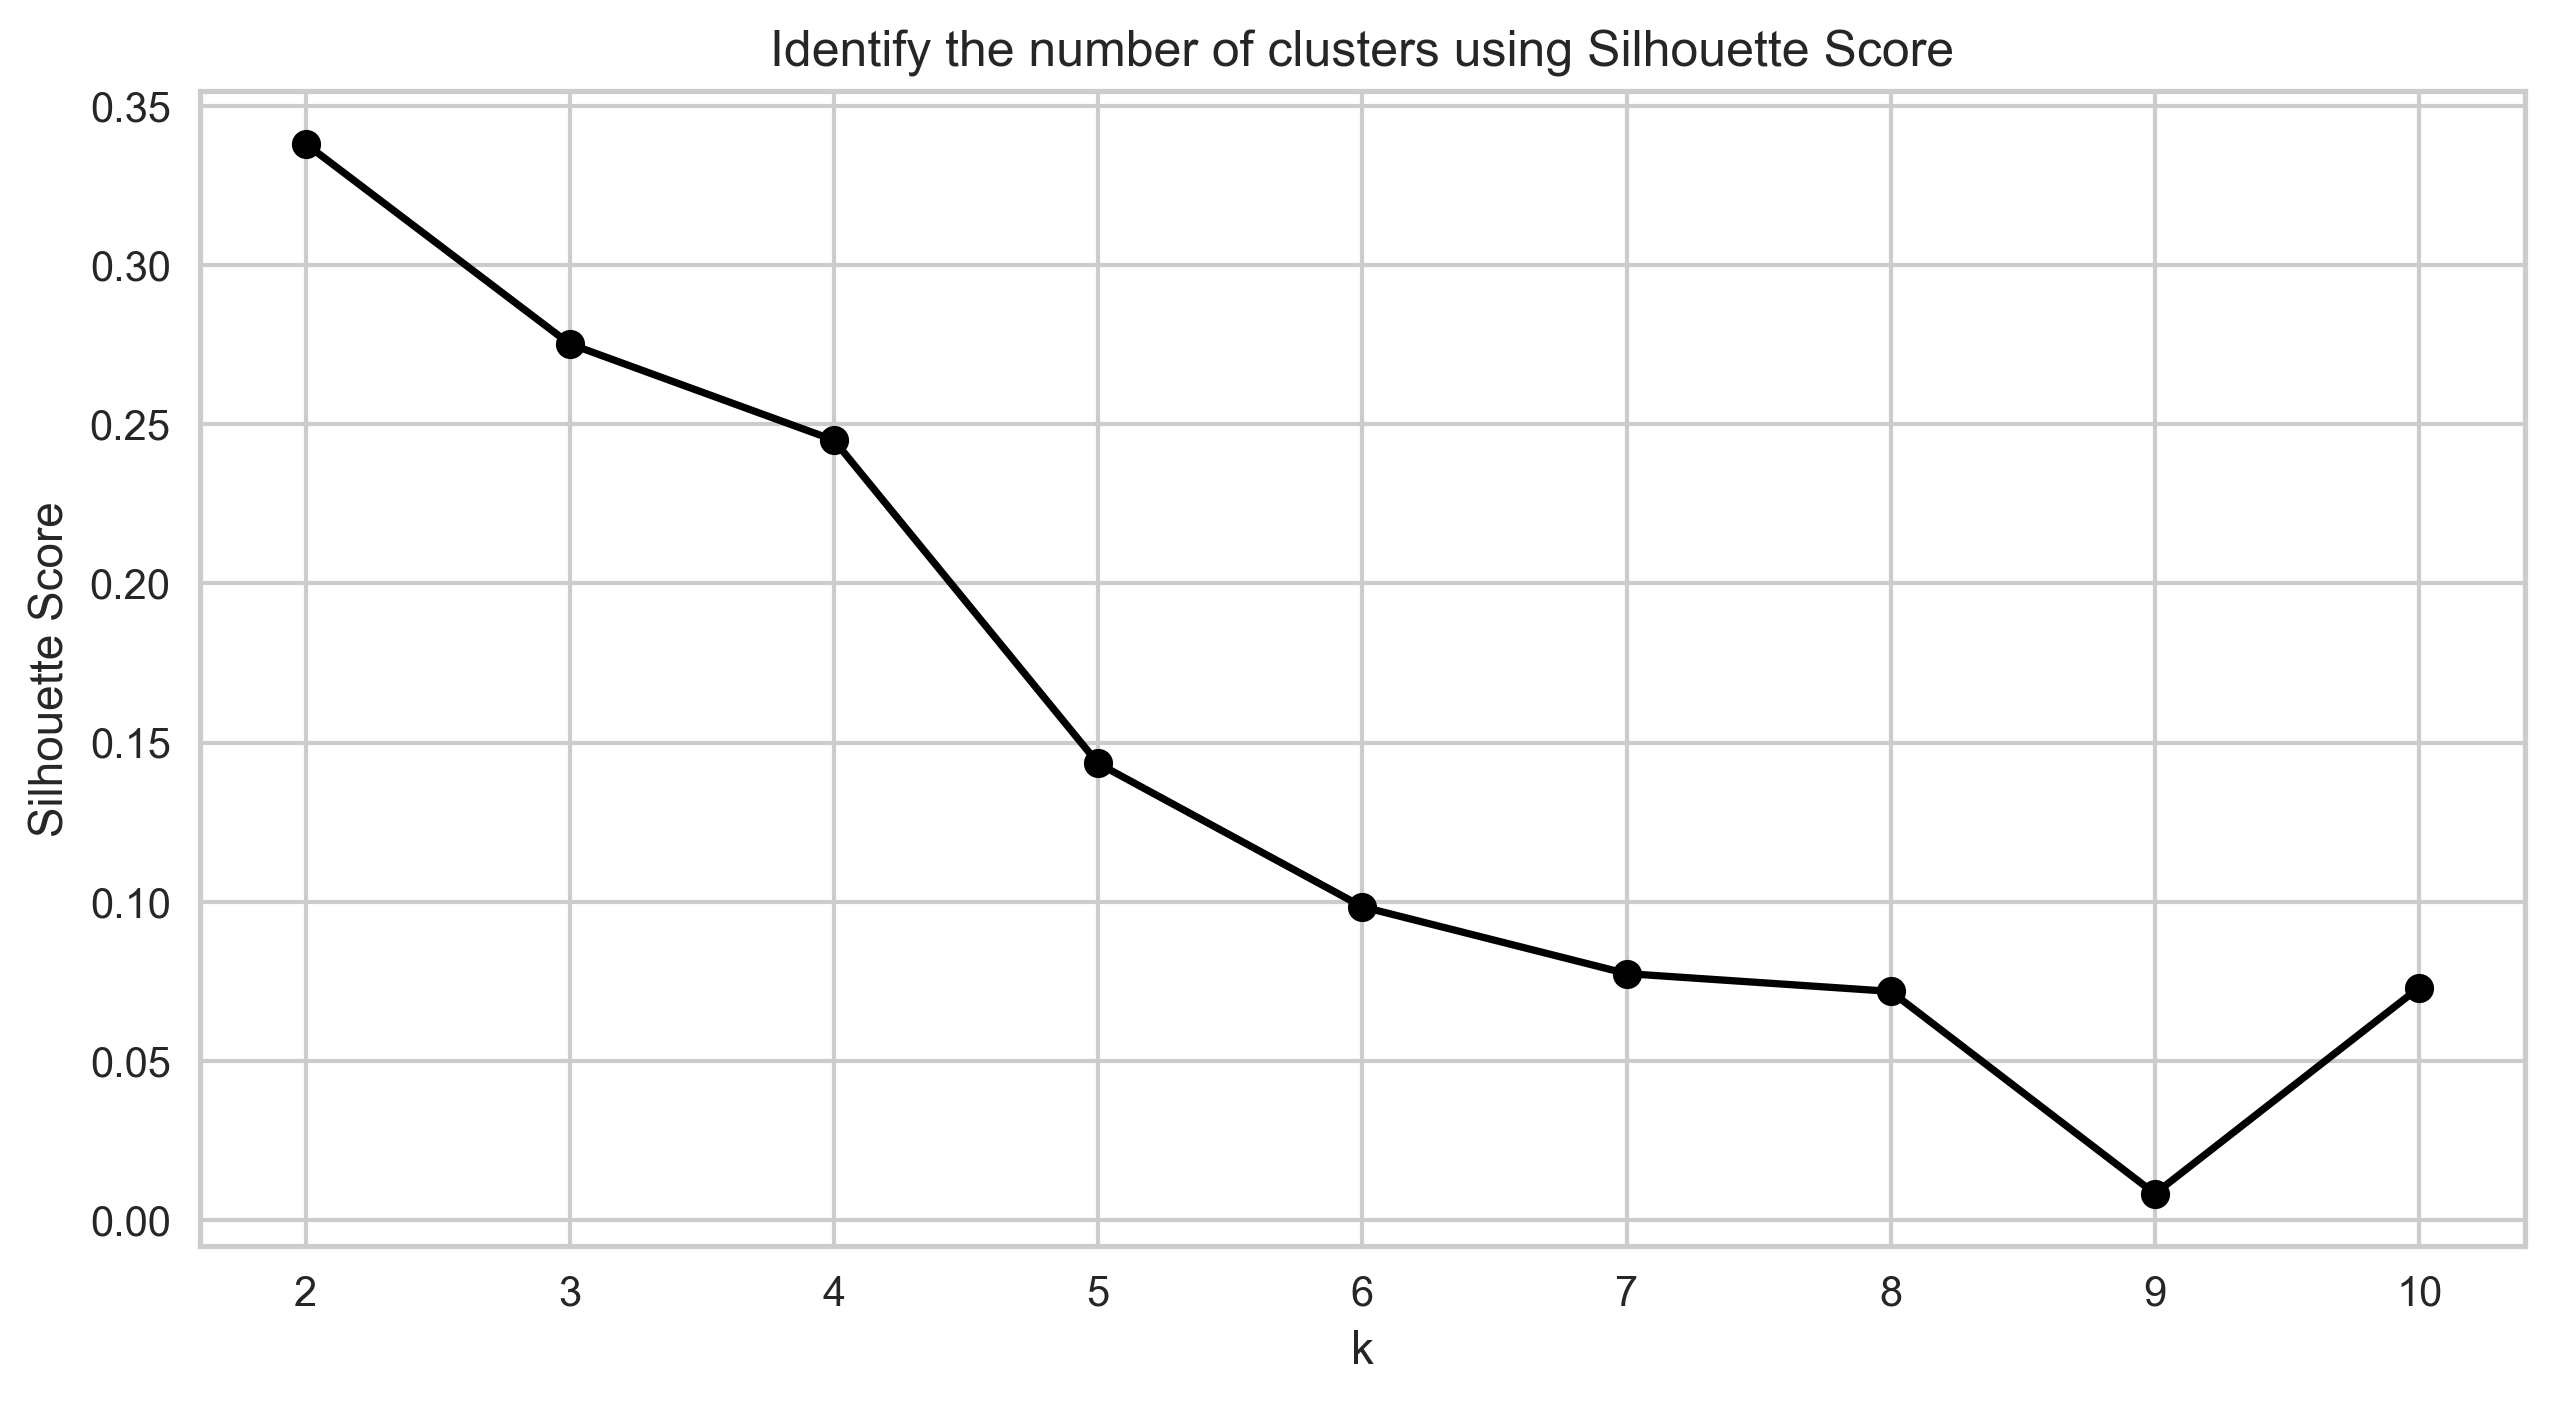

In [63]:
# Create empty list
S=[]

# Range of clusters to try (2 to 10)
K=range(2,11)

# Select data for clustering model
X = pca_2.fit_transform(X_std_2)

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(X, labels, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(10,5), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

## Algoritimo de Regressão - Variável Resposta Spent

### Separação Treino e Teste

In [65]:
data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 42)

### Setup Pycaret

In [71]:
regression = setup(data = df, target = 'Spent', session_id=42, normalize = True,
                      categorical_imputation = 'constant', numeric_imputation = 'median', 
                       ignore_features = ['ID', 'Total_Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                          'AcceptedCmp4', 'AcceptedCmp5','MntWines','MntFruits','MntMeatProducts',
                                          'MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases',
                                          'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth', 
                                          'Life_Time', 'Dt_Customer', 'Complain', 'Response', 'Recency', 'Clusters'],
                       numeric_features = ['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
                                           'Recency',
                                           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                           'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                           'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                           'Complain', 'Response', 'Age',  'Family_size', 'Parent',
                                           'Life_Time', 'Total_Response', 'Clusters'])

In [72]:
best_model_regression = compare_models()

### Tunagem do Modelo

In [73]:
tuned_model = tune_model(best_model_regression, n_iter = 100, choose_better = True, optimize = 'R2')

In [74]:
final_tuned_model_regression = finalize_model(tuned_model)

In [76]:
df_previsao_r = predict_model(final_tuned_model_regression, data_test)

In [78]:
df_previsao_r.groupby('Clusters')['Education', 'Income', 'Marital_Status', 'Total_Response', 'Life_Time', 'Family_size', 'Parent', 'Spent', 'Label'].mean()

Education        Income  Marital_Status  Total_Response   Life_Time  \
Clusters                                                                        
0          2.527778  77347.902778        2.000000        1.583333  356.833333   
1          2.441441  42794.927928        1.081081        0.234234  336.018018   
2          1.707547  36363.660377        1.990566        0.169811  338.481132   
3          3.009009  54243.594595        1.990991        0.234234  343.540541   
4          2.418605  76771.534884        1.000000        1.255814  348.511628   

          Family_size    Parent        Spent        Label  
Clusters                                                   
0            2.166667  0.152778  1459.430556  1345.817257  
1            2.153153  0.855856   313.117117   346.006906  
2            3.226415  0.915094   204.056604   215.646865  
3            3.441441  0.972973   489.666667   524.252120  
4            1.116279  0.116279  1388.209302  1311.424669

## Modelo de Classificação em cima de Total Response

### Dumificação da variável resposta

In [79]:
df['TR_D'] = df['Total_Response'].apply(lambda x: 1 if x > 0 else 0)

In [80]:
print('De todos os clientes da base '+str((df['TR_D'].value_counts()[0]/df.shape[0]).round(2)) +' não aceitaram nenhuma promoção')
print('De todos os clientes da base '+str((df['TR_D'].value_counts()[1]/df.shape[0]).round(2)) +' aceitaram pelo menos uma promoção')

De todos os clientes da base 0.73 não aceitaram nenhuma promoção
De todos os clientes da base 0.27 aceitaram pelo menos uma promoção


In [82]:
from pycaret.classification import *

In [83]:
data_train_b, data_test_b = train_test_split(df, test_size = 0.2, random_state = 42)

In [93]:
classification = setup(data = df, target = 'TR_D', session_id=42, normalize = True,
                      categorical_imputation = 'constant', numeric_imputation = 'median', 
                       ignore_features = ['ID', 'Total_Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'],
                      numeric_features = ['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
                                           'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                                           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                           'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
                                           'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
                                           'Complain', 'Response', 'Age', 'Spent', 'Family_size', 'Parent',
                                           'Life_Time', 'Total_Response', 'Clusters'])

In [94]:
best_model_classification = compare_models()

In [97]:
tuned_model = tune_model(best_model_classification, n_iter = 100, choose_better = True, optimize = 'Recall')

In [98]:
final_tuned_model_classification = finalize_model(tuned_model)

In [99]:
predict_model(final_tuned_model_classification, data_test_b)

ID  Education  Marital_Status   Income  Kidhome  Teenhome  \
871    9353          2               1  62450.0        0         1   
1319   8749          2               2  37235.0        1         0   
1495  10770          2               2  65492.0        0         0   
446    5954          3               1  42618.0        1         0   
1284   5043          1               2  26997.0        0         0   
...     ...        ...             ...      ...      ...       ...   
1878   1570          4               2  69702.0        0         1   
1175   1604          3               2  47353.0        0         1   
64     4137          2               2  70666.0        0         0   
77     7503          2               1  75825.0        0         0   
857     425          2               2  55357.0        2         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Age  Spent  Family_size  \
871   2014-01-06       61       515         47  ...   56    995            2   
1319  2014-02-01       68        20          2  ...   31     61            3   
1495  2014-01-26       73       247        161  ...   56   1045            2   
446   2013-10-09       92        76         14  ...   43    192            2   
1284  2012-11-05       89         7         23  ...   64    434            2   
...          ...      ...       ...        ...  ...  ...    ...          ...   
1878  2013-02-19        8       664          9  ...   64   1039            3   
1175  2013-11-13       93       184          2  ...   55    225            3   
64    2013-12-06       29       398         40  ...   67   1076            2   
77    2012-10-12       40      1032        105  ...   39   2209            1   
857   2013-02-19       66       374         64  ...   30    727            4   

      Parent  Life_Time  Total_Response  Clusters  TR_D  Label   Score  
871        1        525               1         1     1      1  0.8971  
1319       1        551               0         2     0      0  0.8006  
1495       0        545               0         0     0      0  0.9770  
446        1        436               0         1     0      0  0.9997  
1284       0         98               0         1     0      0  0.9602  
...      ...        ...             ...       ...   ...    ...     ...  
1878       1        204               0         3     0      0  0.9972  
1175       1        471               0         3     0      0  0.9994  
64         0        494               0         0     0      0  0.9874  
77         0         74               2         4     1      1  0.9885  
857        1        204               0         2     0      0  0.9986  

[443 rows x 36 columns]

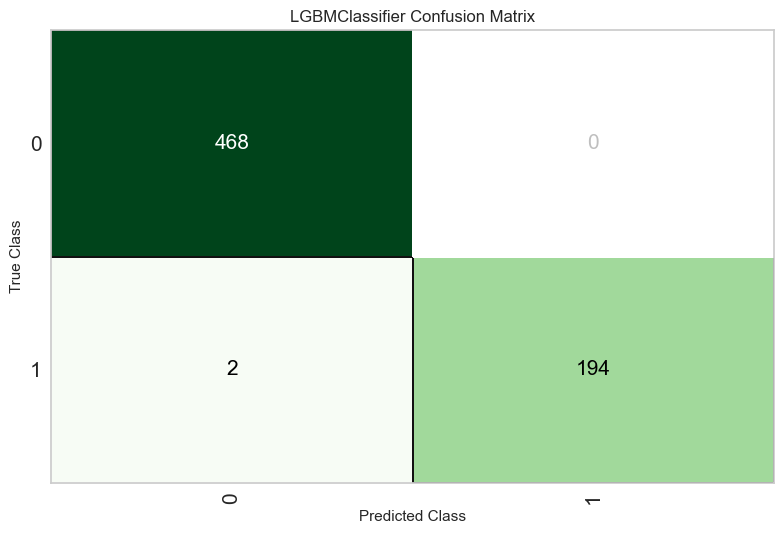

In [100]:
plot_model(final_tuned_model_classification, plot = 'confusion_matrix')